In [1]:
import pandas as pd
import numpy as np

In [2]:
# 1. Load the dataset
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()
crop.shape
crop.info()
crop.isnull().sum()
crop.duplicated().sum()
crop.describe()
crop.corr(numeric_only=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


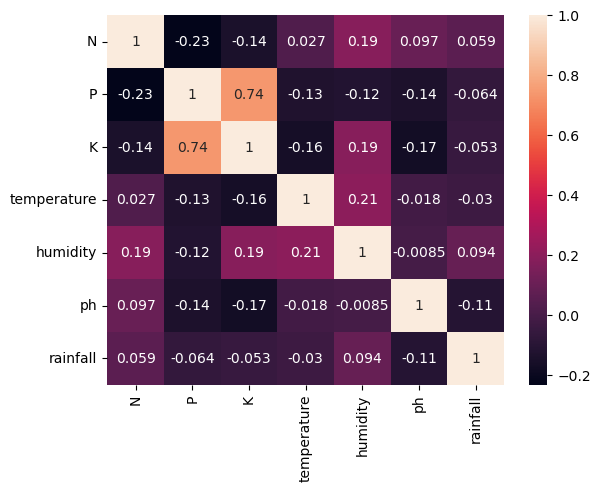

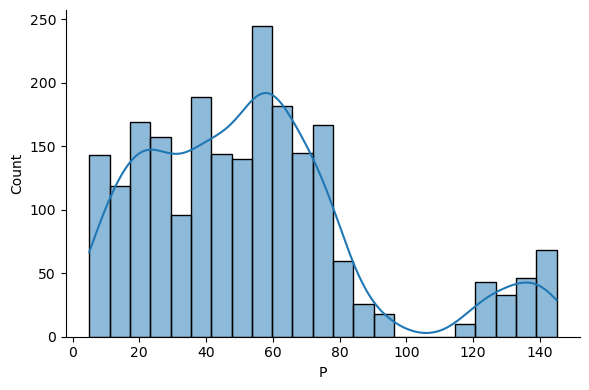

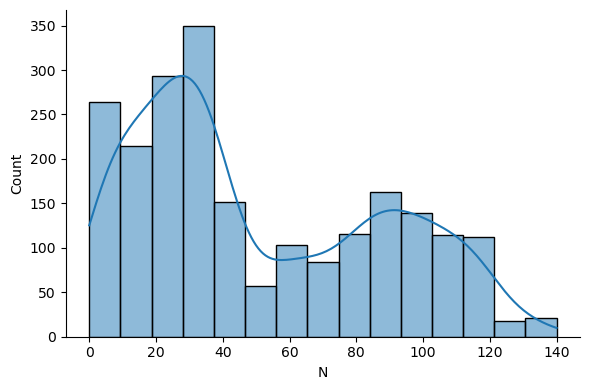

In [3]:
# 2. Plotting / EDA
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(crop.corr(numeric_only=True), annot=True, cbar=True)

sns.displot(crop['P'], kde=True, height=4, aspect=1.5)
plt.show()
sns.displot(crop['N'], kde=True, height=4, aspect=1.5)
plt.show()

In [4]:
# 3. Map textual labels to integers
crop_dict = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5,
    'papaya': 6, 'orange': 7, 'apple': 8, 'muskmelon': 9, 'watermelon': 10,
    'grapes': 11, 'mango': 12, 'banana': 13, 'pomegranate': 14, 'lentil': 15,
    'blackgram': 16, 'mungbean': 17, 'mothbeans': 18, 'pigeonpeas': 19,
    'kidneybeans': 20, 'chickpea': 21, 'coffee': 22
}
crop['label'] = crop['label'].map(crop_dict)

In [5]:
# 4. Prepare features and labels
X = crop.drop('label', axis=1)
y = crop['label']

In [6]:
# 5. Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# 6. Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# 7. Train many models and compare
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, BaggingClassifier,
    GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.metrics import accuracy_score

In [9]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=200),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score:.4f}")

LogisticRegression model with accuracy: 0.9750
GaussianNB model with accuracy: 0.9955
SVC model with accuracy: 0.9773
KNeighborsClassifier model with accuracy: 0.9773
DecisionTreeClassifier model with accuracy: 0.9818
ExtraTreeClassifier model with accuracy: 0.9045
RandomForestClassifier model with accuracy: 0.9977
BaggingClassifier model with accuracy: 0.9886
GradientBoostingClassifier model with accuracy: 0.9909
AdaBoostClassifier model with accuracy: 0.3159


In [10]:
# 8. Pick random forest and re-evaluate
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
print("RandomForest accuracy:", accuracy_score(y_test, y_pred))

RandomForest accuracy: 0.9954545454545455


In [13]:
# 9. Recommendation function (fixed using transform not fit_transform)
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    input_df = pd.DataFrame(
        [[N,P,K,temperature,humidity,ph,rainfall]],
        columns=['N','P','K','temperature','humidity','ph','rainfall']
    )
    mx_features = mx.transform(input_df)
    sc_mx_features = sc.transform(mx_features)
    prediction = randclf.predict(sc_mx_features)
    return prediction[0]
  # returns numeric label

In [14]:
# Example
N=90; P=42; K=43; temperature=20.879744; humidity=82.002744; ph=6.502985; rainfall=202.935536
pred_label = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [15]:
# Convert back to crop name
inv_crop_dict = {v:k for k,v in crop_dict.items()}
pred_crop_name = inv_crop_dict.get(pred_label, "Unknown")
print("Predicted crop:", pred_crop_name)

Predicted crop: rice


In [16]:
# or with joblib
from joblib import dump
dump(randclf, "model.joblib")
dump(sc, "standscaler.joblib")
dump(mx, "minmaxscaler.joblib")

['minmaxscaler.joblib']